# Final Year Project
## Finding Usage Patterns

Target Project: Sudoku Robot Master (https://github.com/Sanahm/Sudoku-robot) <br>
Target Library: Tensorflow

In the open source project for Sudoku Robot Master, the library **Tensorflow** is being used in the python file named **mnist_model_convolutionnel.py**

### Preparing Datas

The data from the previous prcoess (Identifying Usage Pattern) is being prepared in the following segement. <br>
The data will be represented in a dictionary. <br>
The name of each API Call or Method Invocation will represent the key in the dictionary. <br>
The value of each key will be a list of Usage Patterns that the API Call is involved in. <br>

In [1]:
#get usage_pattern_dict from other jupyter file
from functions import *
%store -r usage_pattern_dict 
usage_pattern_dict = usage_pattern_dict
usage_pattern_dict

{'tf.placeholder': [<classes.UsagePattern at 0x24a95e1c7f0>],
 'tf.reshape': [<classes.UsagePattern at 0x24ab46de610>,
 'tf.argmax': [<classes.UsagePattern at 0x24ab4e17580>,
 'tf.nn.softmax': [<classes.UsagePattern at 0x24ab52bd970>],
 'tf.reduce_mean': [<classes.UsagePattern at 0x24ab52afc70>],
 'tf.nn.softmax_cross_entropy_with_logits': [<classes.UsagePattern at 0x24ab52afa60>],
 'tf.train.GradientDescentOptimizer': [<classes.UsagePattern at 0x24ab52af850>],
 'tf.equal': [<classes.UsagePattern at 0x24ab52af700>],
 'tf.cast': [<classes.UsagePattern at 0x24ab52af040>],
 'tf.global_variables_initializer': [<classes.UsagePattern at 0x24ab52af820>],
 'tf.train.Saver': [<classes.UsagePattern at 0x24ab52afa00>],
 'tf.Session': [<classes.UsagePattern at 0x24ab52af2e0>],
 'tf.Variable': [<classes.UsagePattern at 0x24ab52af1c0>,
 'tf.truncated_normal': [<classes.UsagePattern at 0x24ab52af370>],
 'tf.constant': [<classes.UsagePattern at 0x24ab52af910>],
 'tf.nn.conv2d': [<classes.UsagePattern 

### Identifying Clusters

Some method invocation have more than 1 usage patterns. For these method invocation, clusters of usage patterns should be identified. Ideally, each cluster should represent a distinct co-usage pattern or a API feature.

#### Identifying Clusters for 'tf.reshape()'

From below, it is seen that 'tf.reshape()' is invoked in 2 separate usage patterns.

In [2]:
usage_pattern_dict['tf.reshape']

#### Constructing Similarity Matrix

As there are 2 separate usage patterns - a similarity matrix of size 2x2 will be constructed. <br> 
The similarity matrix will be constructed using the Jaccard Index among the pre, post and accompany sets of the 2 separate usage patterns. <br>

In [3]:
target_usage_pattern_list = usage_pattern_dict['tf.reshape']
for usage_pattern in target_usage_pattern_list:
    usage_pattern.print()

========== Usage Pattern ==========
Target Method: tf.reshape
Pre-Set: {tf.placeholder}
Post-Set: {tf.placeholder, tf.argmax}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: tf.reshape
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}


The similarity matrix is shown below. <br>
For the value in (0,1), it represents the similarity value of usage pattern 1/sequence 1 (s1) and usage pattern 2/sequence 2 (s2). <br>
Jaccard Index for pre, post and accompany sets for s1 and s2 are being added together and divided by 3 to obtain this value. <br>

In [4]:
from pandas import *
similarity_matrix = generate_similarity_matrix(target_usage_pattern_list)
print(DataFrame(similarity_matrix))


          0         1
0  1.000000  0.333333
1  0.333333  1.000000


#### Generating the clusters

Below shows the clusters for this 2 sequences. As these 2 sequences have very little similarity (similarity value = 0.33333), they are part of 2 clusters.

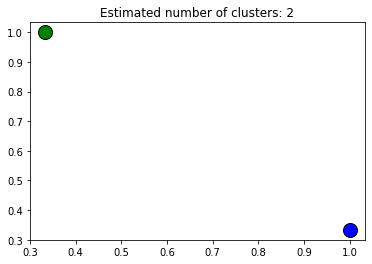

Labels:
[0 1]


In [5]:
generate_clusters(similarity_matrix, True)

### Repeat Steps for all Method Invocations or API Calls.

In [6]:
for key in usage_pattern_dict:
    print("=================================================")
    print("Method Invocation: " + key)
    print()

    target_usage_pattern_list = usage_pattern_dict[key]

    if len(target_usage_pattern_list) == 1:
        print("Method Invocation contains only 1 usage pattern.")
        print("No clusters are generated. ")
    else:
        similarity_matrix = generate_similarity_matrix(target_usage_pattern_list)
        print("Similarity Matrix: ")
        print(DataFrame(similarity_matrix))
        print()
        generate_clusters(similarity_matrix, False)
    

Method Invocation: tf.placeholder

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.reshape

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000

Labels:
[0 1]
Method Invocation: tf.argmax

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000

Labels:
[0 1]
Method Invocation: tf.nn.softmax

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.reduce_mean

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.softmax_cross_entropy_with_logits

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.train.GradientDescentOptimizer

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.equal

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.cast



Method Invocation: tf.reshape

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



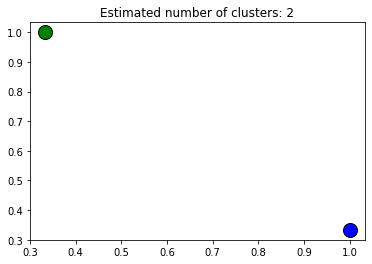

Labels:
[0 1]
Method Invocation: tf.argmax

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



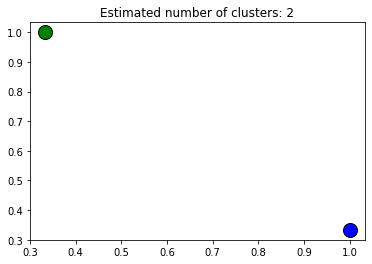

Labels:
[0 1]
Method Invocation: tf.Variable

Similarity Matrix: 
          0         1
0  1.000000  0.666667
1  0.666667  1.000000



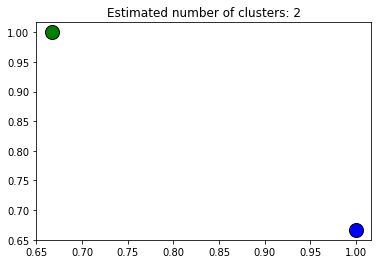

Labels:
[0 1]
Method Invocation: tf.nn.relu

Similarity Matrix: 
          0         1
0  1.000000  0.666667
1  0.666667  1.000000



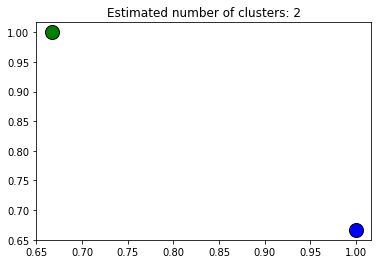

Labels:
[0 1]


In [8]:
for key in usage_pattern_dict:
    target_usage_pattern_list = usage_pattern_dict[key]
    if len(target_usage_pattern_list) == 1:
        pass
    else:
        print("=================================================")
        print("Method Invocation: " + key)
        print()
        similarity_matrix = generate_similarity_matrix(target_usage_pattern_list)
        print("Similarity Matrix: ")
        print(DataFrame(similarity_matrix))
        print()
        generate_clusters(similarity_matrix, True)